# Priprema za kolokvijum

In [1]:
import numpy as np
import pandas as pd
import utils_nans1 as utils

import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [2]:
train_df = pd.read_csv("./data/train.csv")

In [3]:
train_df["zvanje"] = train_df["zvanje"].interpolate("cubicspline", limit_direction="both")
train_df["godina_doktor"] = train_df["godina_doktor"].interpolate("linear", limit_direction="both")

## Zadatak 3
Unaprediti model tako da su sve pretpostavke zadovoljene i ostvaruje RMSE < `11 170`. Koristiti *train/val* podelu u odnosu: *80/20*. Ispisati meru koju model ostvaruje.

*Napomena: koristiti `random state = 42` (kako bi se rezultati mogli reprodukovati).*


In [14]:
features = train_df.drop(columns=["plata", "pol Muski", "pol Zenski", "godina_iskustva"])
labels = train_df["plata"]

x_train, x_val, y_train, y_val = train_test_split(features, labels, train_size=0.8, shuffle=True, random_state=42)
x_train_with_const = sm.add_constant(x_train)
model = sm.OLS(y_train, x_train_with_const).fit()

In [15]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  plata   R-squared:                       0.346
Model:                            OLS   Adj. R-squared:                  0.337
Method:                 Least Squares   F-statistic:                     41.01
Date:                Mon, 25 Nov 2024   Prob (F-statistic):           2.57e-21
Time:                        11:38:33   Log-Likelihood:                -2712.3
No. Observations:                 237   AIC:                             5433.
Df Residuals:                     233   BIC:                             5446.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          7.216e+04   4191.447     17.216      0.000    6.39e+04    8.04e+04
zvanje         4992.8674   1191.600      4.190      0.000    2645.181    7340.554
oblast         1.283e+04   3025.746      4.242      0.000    6872.706    1.88e+04
godina_doktor  1053.4014    127.068      8.290      0.000     803.053    1303.750
==============================================================================
Omnibus:                       13.557   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               14.634
Skew:                           0.608   Prob(JB):                     0.000664
Kurtosis:                       3.052   Cond. No.                         78.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
utils.get_rmse(model, x_val, y_val)

np.float64(20987.86664375495)

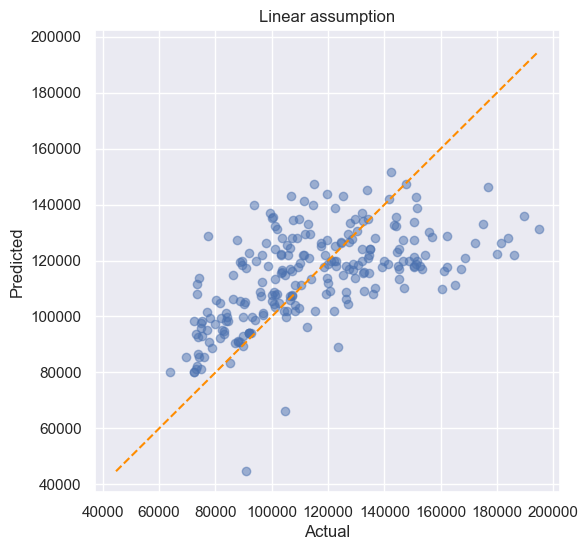

(True, np.float64(2.569450558502214e-21))


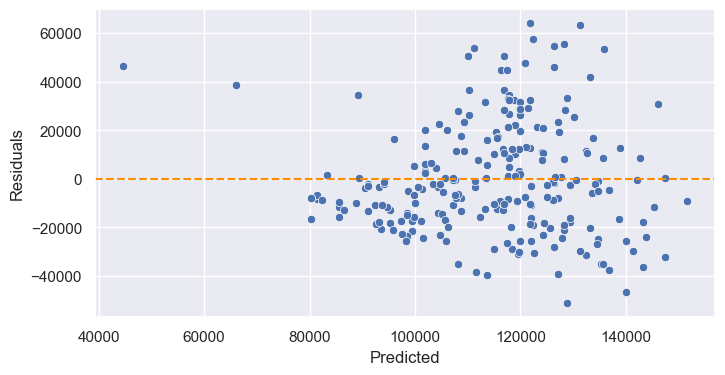

('negative', np.float64(2.0059230309922826))


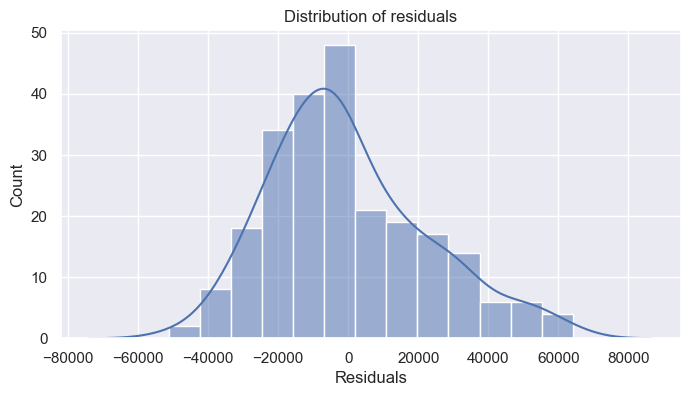

('non-normal', np.float64(3.991805079161706e-06))


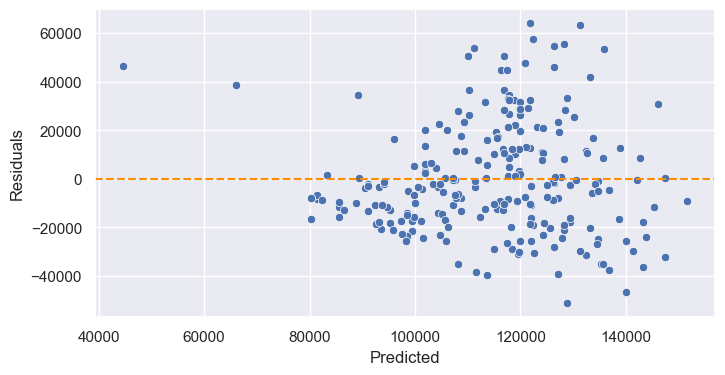

('equal', np.float64(0.9802452574272686))


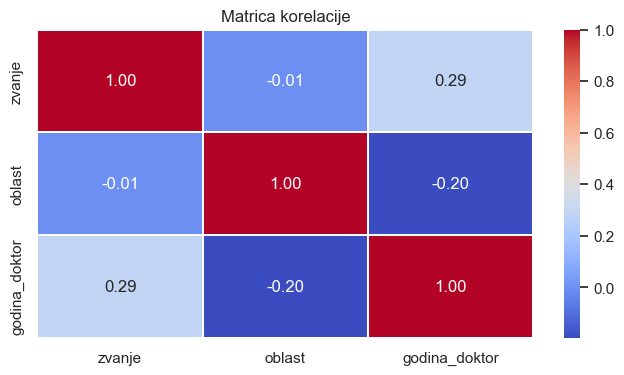

False


In [17]:
print(utils.linear_assumption(model, x_train_with_const, y_train))
print(utils.independence_of_errors_assumption(model, x_train_with_const, y_train))
print(utils.normality_of_errors_assumption(model, x_train_with_const, y_train))
print(utils.equal_variance_assumption(model, x_train_with_const, y_train))
print(utils.perfect_collinearity_assumption(x_train))